# Online-Food-Ordering

A data science project to determine the best location for the delivery workers of an online food ordering company.

*note: This is the capstone project of the "IBM Data Science Professional Certificate" on Coursera.*


## Table of contents

1. Introduction: Business Problem & Background
2. Data
3. Methodology
4. Analysis
5. Results and Discussion
6. Conclusion

## 1. Introduction 
### 1.1. Business Problem:
Used the Foursquare API and London data to cluster neighborhoods and determine the best location for the delivery workers of an online food ordering company.

### 1.2. Background:
Online food ordering is a system to order the restaurants' food through the website or mobile app. Based on the type of this system, a customer can choose a restaurant, scan the menu items, select the desired items and pay it. These websites give customers information about the food, price, duration of the food preparation and so on.

Based on the reports, the online food ordering market have significantly increased all over the world. For instance, 40 percent of Americans having ordered their food online at least once.

There are different types of online food ordering. One of the main ones is managed by online food delivery companies. In this method, these companies receive the costumer order on their website or mobile app and connect the costumer to the restaurant. After that the costumer ordered and payed the food, they can get the food in door. This is done with some delivery workers (normally with motorcycle or bicycle) who working for the online food delivery companies and are supposed to transfer the food from the restaurants to the costumer's house or office. Naturally, these delivery companies work with lots of restaurants.

What is seriously important for the delivery companies is that they should deliver the food as soon as possible, in order to reduce the delivery time, increase customer's satisfaction, and get more orders. Therefore, it is noticeably vital for these companies to arrange their delivery workers to save the time. To do so, the location of the delivery workers should be optimized in order to reduce the distance they have to drive each time.

The idea behind this project is to cluster the neighborhoods of the city (here London is chosen as the case study) to ensure that the workers have to drive less distance in each area. In this project, the data of the restaurants’ location and the population of each area of the city is required.

This project is useful for all the online food delivery companies who would like to increase their performance and profit.

## 2. Data
To answer the business problem, the following data are extracted from the following sources:
* Population of Each Neighborhood
* Number of Restaurants in Each Neighborhood (Foursquare API)
* Coordinates of the Neighborhoods of London

Following data sources will be needed to extract/generate the required information:

* Population of each area will be obtained using **London Borough Profiles Database** (https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv)

* Coordinate of London center will be obtained by **pasring the wikipedia web page: List_of_London_boroughs** (https://en.wikipedia.org/wiki/List_of_London_boroughs)

* Number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**


To start the project, first, it is necessary to download and import the libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install beautifulsoup4
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


Then, the data of London borough is downloaded and explored. Here the encoding should "ISO-8859-1" be chosen.

In [2]:
# import CSV file containing the Data
# reference: https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv
london_borough_profiles = pd.read_csv("london-borough-profiles.csv",encoding = "ISO-8859-1")
london_borough_profiles

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(£),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"£63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.2,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,

As we can see, there are some rows which are not borough name and should be droped. After cleaning data, it is clear that London has 33 boroughs.

In [3]:
# drop Not assigned Borough
london_borough_profiles['Inner/_Outer_London'].replace('NaN', np.nan, inplace=True)
london_borough_profiles.dropna(subset=['Inner/_Outer_London'], inplace=True)
london_borough_profiles.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(£),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"£63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.2,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,

After that, it is necessary to extract the required data including Borough Name and Population from the dataset and create a new DataFrame called **Borough** containing each borough's population.

In [4]:
#define Borough dataframe
Borough = london_borough_profiles[['Area_name','GLA_Population_Estimate_2017']].copy()

# rename the column names to match with the base dataframe
Borough.rename(columns={'Area_name': 'Borough', 'GLA_Population_Estimate_2017': 'Population'}, inplace=True)
Borough

,Borough,Population
0,City of London,8800
1,Barking and Dagenham,209000
2,Barnet,389600
3,Bexley,244300
4,Brent,332100
5,Bromley,327900
6,Camden,242500
7,Croydon,386500
8,Ealing,351600
9,Enfield,333000


Now it's time to get the latitude and the longitude coordinates of each neighborhood. To do so, the list of London boroughs is read from the Wikipedia web page containing coordinates of each borough.

In [5]:
# Reading the web page into Python
r = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs')

# print the first 500 characters of the HTML
print(r.text[0:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of London boroughs - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":881899861,"wgRevisionId":881899861,"wgArticle


To extract the data of the web page, first, the HTML is parsed using BeautifulSoup. Second, the comments and references of the page are removed from the text. Finally, as the data of this page is provided in two tables, the data is collected from the two tables in this web page, and then cleared.

In [6]:
# parsing the HTML using the BeautifulSoup
soup = BeautifulSoup(r.text,'html.parser')

#remove comments from the text
from bs4 import Comment
comments = soup.findAll(text=lambda text:isinstance(text, Comment))
for comment in comments:
    comment.extract()

#remove references from the text
references = soup.findAll("sup", {"class": "reference"})
if references:
    for ref in references:
        ref.extract()
    
# collecting all of the records
data = []
tables = soup.findAll('table', attrs={'class':'wikitable sortable'})
for table in tables:
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele]) # Get rid of empty values
del data[0] #delete header row
data

[['Barking and Dagenham',
  'Barking and Dagenham London Borough Council',
  'Labour',
  'Town Hall, 1 Town Square',
  '13.93',
  '194,352',
  '51°33′39″N 0°09′21″E\ufeff / \ufeff51.5607°N 0.1557°E\ufeff / 51.5607; 0.1557\ufeff (Barking and Dagenham)',
  '25'],
 ['Barnet',
  'Barnet London Borough Council',
  'Conservative',
  'North London Business Park, Oakleigh Road South',
  '33.49',
  '369,088',
  '51°37′31″N 0°09′06″W\ufeff / \ufeff51.6252°N 0.1517°W\ufeff / 51.6252; -0.1517\ufeff (Barnet)',
  '31'],
 ['Bexley',
  'Bexley London Borough Council',
  'Conservative',
  'Civic Offices, 2 Watling Street',
  '23.38',
  '236,687',
  '51°27′18″N 0°09′02″E\ufeff / \ufeff51.4549°N 0.1505°E\ufeff / 51.4549; 0.1505\ufeff (Bexley)',
  '23'],
 ['Brent',
  'Brent London Borough Council',
  'Labour',
  'Brent Civic Centre, Engineers Way',
  '16.70',
  '317,264',
  '51°33′32″N 0°16′54″W\ufeff / \ufeff51.5588°N 0.2817°W\ufeff / 51.5588; -0.2817\ufeff (Brent)',
  '12'],
 ['Bromley',
  'Bromley Lond

In the next step, the regular expressions library is applied to extract the values of Latitude and Longitude for each borough. By using the extracted data, the DataFrame of coordinates (called **Coordinates**) is defined and created.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Coordinates = pd.DataFrame(columns=column_names)

#import reqular expressions library to search in text
import re

#fill the dataframe
for i in data:
    if len(i)!=0:
        for idx, val in enumerate(i):
            if "°N" in val:
                coordinate_text = val
        borough = i[0]
        latitude = re.findall('\S+°N' ,coordinate_text)[0]
        latitude = latitude.replace(u'\ufeff','')
        latitude = latitude.replace('°N','')
        latitude = float(latitude)
        try:
            longitude = re.findall('\S+°E' ,coordinate_text)[0]
            longitude = longitude.replace(u'\ufeff','')
            longitude = longitude.replace('°E','')
            longitude = float(longitude)
        except:
            longitude = re.findall('\S+°W' ,coordinate_text)[0]
            longitude = longitude.replace(u'\ufeff','')
            longitude = longitude.replace('°W','')
            longitude = -float(longitude)
        Coordinates = Coordinates.append({'Borough': borough,
                                          'Latitude': latitude,
                                          'Longitude': longitude
                                             }, ignore_index=True)

#show the first 10 rows
Coordinates


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


To create the finall database called **df**, the data from both dataframes (**Brough** and **Coordinates**) should be merged.

In [8]:
# merge to dataframes based on the PostalCode column
df = pd.merge(Borough , Coordinates, on=['Borough'], how='inner')
df

,Borough,Population,Latitude,Longitude
0,City of London,8800,51.5155,-0.0922
1,Barking and Dagenham,209000,51.5607,0.1557
2,Barnet,389600,51.6252,-0.1517
3,Bexley,244300,51.4549,0.1505
4,Brent,332100,51.5588,-0.2817
5,Bromley,327900,51.4039,0.0198
6,Camden,242500,51.5290,-0.1255
7,Croydon,386500,51.3714,-0.0977
8,Ealing,351600,51.5130,-0.3089
9,Enfield,333000,51.6538,-0.0799


In [9]:
# save dataframe to a csv file
df.to_csv('cleaned_df.csv')
# size of the dataframe
df.shape

(33, 4)

Now, the geographical coordinates of London should be gotten using **geolocator** which converts an address into latitude and longitude values

In [10]:
#The geograpical coordinate of London
address = 'London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


After that, the folium library is applied to Visualize the neighborhoods of London

In [11]:
# create map of London using latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

The third part of the required data is the data should be extracted from Foursquare by defining a Foursquare Credentials and Version.

In [12]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BXSYM3MAGOU2LHECRXO52GOUASHLHIAQKOICJ15XX4YVZL4W
CLIENT_SECRET:0CVAJMGINQZIVMLQYCGWWH3RY3ALWU5CQNHGD2ZHXMRHELHX


By exploring the neighborhoods in London, all the restaurants data is extracted by defining a function to look up top 200 places within 2,000 meters of coordinates.

In [13]:
LIMIT = 200

def getNearbyVenues(names, latitudes, longitudes, radius = 2000, food_category = '4d4b7105d754a06374d81259'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            food_category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Run the above function on each neighborhood and create a new dataframe called London_venues

London_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



City of London
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


Then, the function is applied on each neighborhood and a new dataframe called **London_venues** containing food category venues is created.

In [15]:
# the size of the resulting dataframe
print(London_venues.shape)
London_venues.head()

(2283, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.5155,-0.0922,Goodman Steak House Restaurant,51.514398,-0.090745,Steakhouse
1,City of London,51.5155,-0.0922,Hawksmoor Guildhall,51.515647,-0.090997,Steakhouse
2,City of London,51.5155,-0.0922,City Càphê,51.514750,-0.091545,Vietnamese Restaurant
3,City of London,51.5155,-0.0922,Pilpel,51.515195,-0.098462,Falafel Restaurant
4,City of London,51.5155,-0.0922,Burger & Lobster,51.513687,-0.094643,Seafood Restaurant


Let's check how many food category venues were returned for each neighborhood

In [16]:
London_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Barnet,55,55,55,55,55,55
Bexley,40,40,40,40,40,40
Brent,74,74,74,74,74,74
Bromley,43,43,43,43,43,43
Camden,100,100,100,100,100,100
City of London,100,100,100,100,100,100
Croydon,79,79,79,79,79,79
Ealing,100,100,100,100,100,100


In [17]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 110 uniques categories.


<a id='item3'></a>

## 3. Methodology


The scope of this project is to determine the areas of London with most food category venues (restaurant, fast food, cafe,...) density, particularly those in crowded areas with high population.

In first step we have collected the required data: location and type (category) of food category venues (according to Foursquare categorization) and population of each area.

Second step in our analysis will be calculation and exploration of 'venue density' across different areas of London

In the third step, we will focus on most promising areas and within those create clusters of locations. We will take into consideration locations in radius of 2000 meters. We will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify neighborhoods. Then, the scatter plot of population and number of each venues for each cluster is presented.

## 4. Analysis

At first, one hot encode the unique categories is done to convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. 

In [18]:
# one hot encoding
London_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Place,Chinese Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Okonomiyaki Restaurant,Pakistani Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,Shaanxi Restaurant,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Vietnamese Restaurant,Wings Joint,Yakitori Restaurant
0,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [19]:
London_onehot.shape

(2283, 111)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()
London_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Place,Chinese Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Okonomiyaki Restaurant,Pakistani Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,Shaanxi Restaurant,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Vietnamese Restaurant,Wings Joint,Yakitori Restaurant
0,Barking and Dagenham,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.00,0.000000,0.000000,0.00,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.142857,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.142857,0.00,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.142857,0.00,0.000000,0.00,0.000000,0.00,0.00
1,Barnet,0.00,0.000000,0.018182,0.00,0.00,0.018182,0.00,0.00,0.000000,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.236364,0.00,0.000000,0.000000,0.00,0.00,0.054545,0.000000,0.000000,0.000000,0.018182,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.054545,0.00,0.072727,0.000000,0.000000,0.00,0.000000,0.018182,0.000000,0.000000,0.00,0.00,0.018182,0.000000,0.00,0.00,0.054545,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.036364,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.054545,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.036364,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.018182,0.000000,0.000000,0.054545,0.00,0.00,0.00,0.000000,0.018182,0.072727,0.00,0.000000,0.00,0.000000,0.00,0.00
2,Bexley,0.00,0.000000,0.075000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.025000,0.00,0.000000,0.000000,0.00,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.025000,0.00,0.00,0.125000,0.00,0.025000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000

Let's confirm the new size

In [21]:
London_grouped.shape

(33, 111)

Here, each neighborhood along with the top 5 most common venues is printed.

In [22]:
num_top_venues = 5

for hood in London_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0            Restaurant  0.14
1    Chinese Restaurant  0.14
2    Turkish Restaurant  0.14
3           Pizza Place  0.14
4  Fast Food Restaurant  0.14


----Barnet----
                venue  freq
0                Café  0.24
1  Italian Restaurant  0.09
2  Turkish Restaurant  0.07
3   Fish & Chips Shop  0.07
4         Pizza Place  0.05


----Bexley----
                  venue  freq
0  Fast Food Restaurant  0.12
1    Chinese Restaurant  0.12
2    Italian Restaurant  0.10
3   American Restaurant  0.08
4     Indian Restaurant  0.08


----Brent----
                  venue  freq
0     Indian Restaurant  0.19
1  Fast Food Restaurant  0.11
2        Sandwich Place  0.09
3                  Café  0.07
4            Restaurant  0.05


----Bromley----
                  venue  freq
0           Pizza Place  0.12
1        Sandwich Place  0.09
2                  Café  0.09
3    Italian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Camden---

In order to put data into a *pandas* dataframe, first, a function is written to sort the venues in descending order.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe called **neighborhoods_venues_sorted** and display the top 10 venues for each neighborhood.

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = London_grouped['Neighborhood']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Restaurant,Turkish Restaurant,Pizza Place,Chinese Restaurant,Café,Fast Food Restaurant,Breakfast Spot,Fried Chicken Joint,English Restaurant,Doner Restaurant
1,Barnet,Café,Italian Restaurant,Fish & Chips Shop,Turkish Restaurant,Indian Restaurant,Sushi Restaurant,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Mediterranean Restaurant
2,Bexley,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Indian Restaurant,American Restaurant,Bakery,Greek Restaurant,Restaurant,Pizza Place,Sandwich Place
3,Brent,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Café,Pizza Place,Restaurant,Bakery,Italian Restaurant,Portuguese Restaurant,American Restaurant
4,Bromley,Pizza Place,Café,Sandwich Place,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Bakery,Sushi Restaurant,Burger Joint,Seafood Restaurant


In the next step, *k*-means is executed to cluster the neighborhood into 8 clusters.

In [25]:
# set number of clusters
kclusters = 8

London_grouped_clustering = London_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 4, 2, 1, 5, 5, 2, 1, 2], dtype=int32)

Let's create a new dataframe (called **London_merged**) that includes the cluster as well as the top 10 venues for each neighborhood.

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = df

# rename column name
London_merged.rename(columns={'Borough': 'Neighborhood'}, inplace=True)

# merge London_grouped with df to add latitude/longitude for each neighborhood
London_merged = London_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

London_merged.head() # check the last columns!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of London,8800,51.5155,-0.0922,5,Italian Restaurant,Falafel Restaurant,Food Truck,French Restaurant,Restaurant,Vietnamese Restaurant,Salad Place,Steakhouse,Sushi Restaurant,Seafood Restaurant
1,Barking and Dagenham,209000,51.5607,0.1557,0,Restaurant,Turkish Restaurant,Pizza Place,Chinese Restaurant,Café,Fast Food Restaurant,Breakfast Spot,Fried Chicken Joint,English Restaurant,Doner Restaurant
2,Barnet,389600,51.6252,-0.1517,3,Café,Italian Restaurant,Fish & Chips Shop,Turkish Restaurant,Indian Restaurant,Sushi Restaurant,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Mediterranean Restaurant
3,Bexley,244300,51.4549,0.1505,4,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Indian Restaurant,American Restaurant,Bakery,Greek Restaurant,Restaurant,Pizza Place,Sandwich Place
4,Brent,332100,51.5588,-0.2817,2,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Café,Pizza Place,Restaurant,Bakery,Italian Restaurant,Portuguese Restaurant,American Restaurant


Finally, let's visualize the resulting clusters using folium.

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Neighborhood'], London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now we make a comparison among different clusters based on their population and number of food venues. To do so, we create a dataframe (called **London_venues_count**) to show the total number of food venues in each  neighborhood.

In [28]:
London_venues_count = London_venues.groupby('Neighborhood').count()
London_venues_count = London_venues_count.drop(London_venues_count.columns[1:6], axis=1)
London_venues_count = London_venues_count.rename(columns={'Neighborhood Latitude':'Number of venues'})
London_venues_count

,Number of venues
Neighborhood,
Barking and Dagenham,7
Barnet,55
Bexley,40
Brent,74
Bromley,43
Camden,100
City of London,100
Croydon,79
Ealing,100


Also, let's create a new dataframe showing each neighborhood's cluster label.

In [36]:
London_merged_new = London_merged.drop(London_merged.columns[5:15], axis=1)
London_merged_new

,Neighborhood,Population,Latitude,Longitude,Cluster Labels
0,City of London,8800,51.5155,-0.0922,5
1,Barking and Dagenham,209000,51.5607,0.1557,0
2,Barnet,389600,51.6252,-0.1517,3
3,Bexley,244300,51.4549,0.1505,4
4,Brent,332100,51.5588,-0.2817,2
5,Bromley,327900,51.4039,0.0198,1
6,Camden,242500,51.5290,-0.1255,5
7,Croydon,386500,51.3714,-0.0977,2
8,Ealing,351600,51.5130,-0.3089,1
9,Enfield,333000,51.6538,-0.0799,2


Then, we create the final dataframe of london (called **London_Data**) by merging the previous dataframes.

In [30]:
London_Data = pd.merge(London_merged_new, London_venues_count, on=['Neighborhood'], how='inner')
London_Data.to_csv("London_Data.csv")
London_Data

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,Number of venues
0,City of London,8800,51.5155,-0.0922,5,100
1,Barking and Dagenham,209000,51.5607,0.1557,0,7
2,Barnet,389600,51.6252,-0.1517,3,55
3,Bexley,244300,51.4549,0.1505,4,40
4,Brent,332100,51.5588,-0.2817,2,74
5,Bromley,327900,51.4039,0.0198,1,43
6,Camden,242500,51.5290,-0.1255,5,100
7,Croydon,386500,51.3714,-0.0977,2,79
8,Ealing,351600,51.5130,-0.3089,1,100
9,Enfield,333000,51.6538,-0.0799,2,37


Furthermore, let's see which neighborhoods are in each neighborhoods.

In [31]:
neighborhoods_clustered = London_Data.groupby(['Cluster Labels'])['Neighborhood'].apply(', '.join).to_frame()
neighborhoods_clustered

,Neighborhood
Cluster Labels,
0,Barking and Dagenham
1,"Bromley, Ealing, Greenwich, Hammersmith and Fu..."
2,"Brent, Croydon, Enfield, Harrow, Redbridge"
3,"Barnet, Hackney, Haringey, Lewisham, Waltham F..."
4,"Bexley, Hillingdon"
5,"City of London, Camden, Islington, Lambeth, So..."
6,Havering
7,Hounslow


Moreover, we create a new dataframe called **London_Data_clustered** grouped by cluster labels.

In [32]:
London_Data_clustered = London_Data.groupby('Cluster Labels').sum()
London_Data_clustered = London_Data_clustered.drop(["Longitude","Latitude"], axis=1)
London_Data_clustered = pd.merge(London_Data_clustered, neighborhoods_clustered, on=['Cluster Labels'], how='inner')
London_Data_clustered.to_csv("London_Data_clustered.csv")
London_Data_clustered

,Population,Number of venues,Neighborhood
Cluster Labels,,,
0,209000,7,Barking and Dagenham
1,3055200,940,"Bromley, Ealing, Greenwich, Hammersmith and Fu..."
2,1608100,267,"Brent, Croydon, Enfield, Harrow, Redbridge"
3,1521500,297,"Barnet, Hackney, Haringey, Lewisham, Waltham F..."
4,545300,84,"Bexley, Hillingdon"
5,1367800,600,"City of London, Camden, Islington, Lambeth, So..."
6,254300,37,Havering
7,274200,51,Hounslow


Finally, we visualize the data provided in this database using bar chart and scatter plot.

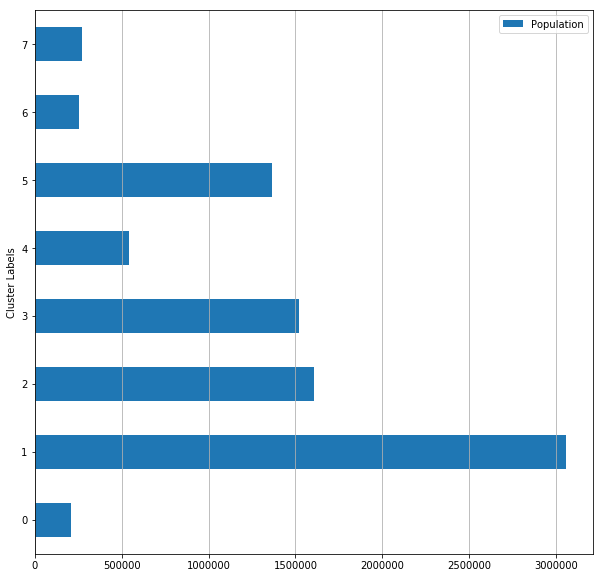

<Figure size 720x720 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
ax = London_Data_clustered.plot(kind='barh', y='Population')
ax.xaxis.grid()
plt.show()
plt.savefig('Population.png')

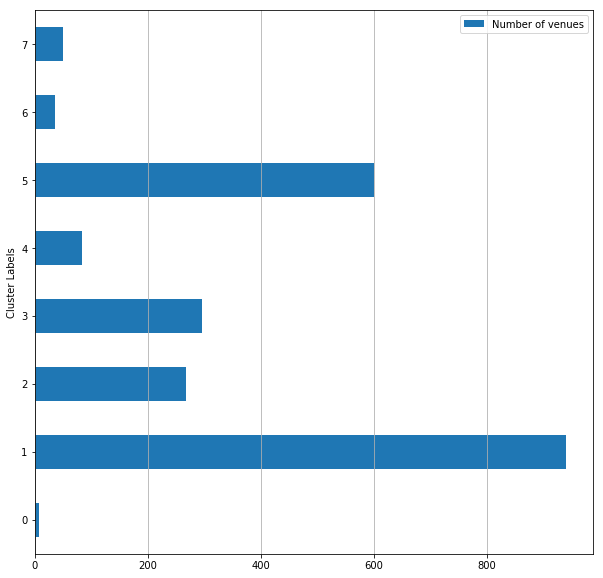

<Figure size 720x720 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
ax = London_Data_clustered.plot(kind='barh', y='Number of venues')
ax.xaxis.grid()
plt.show()
plt.savefig('Number_of_venues.png')

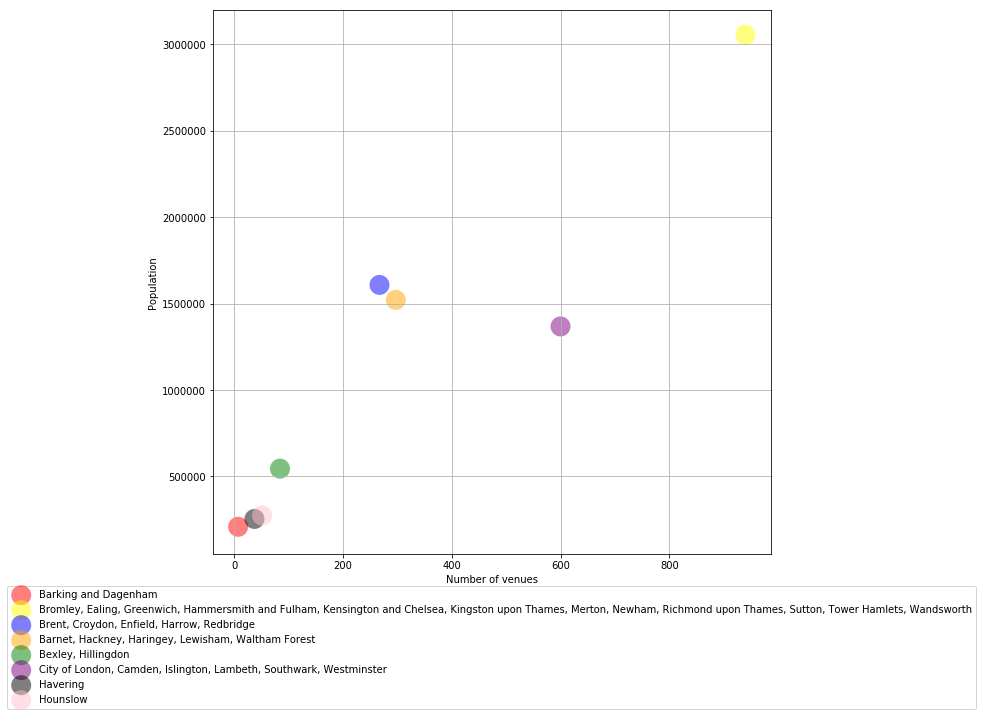

<Figure size 720x720 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x=London_Data_clustered['Number of venues']
y=London_Data_clustered['Population']
scale = 400
label = London_Data_clustered['Neighborhood']
#label = [ '\n'.join(wrap(l, 100)) for l in label ]
colors = ['red','yellow','blue','orange','green','purple','black','pink']
for i in range(8):
    ax.scatter(x[i], y[i], s=scale, c=colors[i], label=label[i], alpha=0.5, edgecolors='none')
plt.xlabel('Number of venues')
plt.ylabel('Population')
plt.rcParams["figure.figsize"] = (10,10)
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1)
plt.show()
plt.savefig('Pop_vs_Ven.png')

## 5. Results and Discussion
The analysis indicates that although there are 33 boroughs in London having different food venues and population, some of these areas are more crowded in comparison to the other ones. Moreover, the density of the food venues in these areas are completely different. This analysis demonstrates the importance of this survey for the stakeholders. Also, it clarified that this diversity among the areas can widely influence the density and location of delivery workers in the city.

In order to get the best results, the k-means method is used to clustering the neighborhoods into 8 clusters. The areas  were illustrated in the map categorizing in the groups with various colors.

As indicated in the "Population" figure, the crowded areas are clusters labeled 3 and 2, while the clusters labeled 4, 6 ad 7 have the least population. Obviously, the other clusters are in the middle. If we consider only the population of each area, the results show that the crowded areas could be potentially good places to arrange the most delivery workers, but it is not the only case we should consider.

On the other hand, there is another factor that could be considered that is the number of food venues (restaurants, cafes, fast foods, ...). Generally, we expect that those areas with more venues need more online services. As illustrated in the "Number of Venues" figure, cluster 0 and cluster 3 have the most food venues, while clusters 4, 6 and 7 have the least ones. 

As we can see, if we consider the two variables ("population" and "number of food venues") one by one, it could give us a good estimation, but not a perfect result. Because, the high number of food venues in an area cannot guarantee that the more people would like use online services, number of food venues itself could not be a variable with a hundred percent accuracy. Moreover, if an area has more population, it does not ensure that alway more restaurants and fast foods are there. Therefore, to estimate the tendency of the customers for ordering online food, it is necessary to evaluate both variables in each area together. 

The final results provided in the scatter plot reveals the relation between "population" and "number of food venues" in each neighborhood. As we can see, the best place to integrate the workers is cluster 3 (neighborhoods: Bromley, Ealing, Enfield, Hammersmith and Fulham, Kensington and Chelsea, Kingston upon Thames, Merton, Richmond upon Thames, Sutton, Tower Hamlets, Wandsworth). After that, we recommend that the company focuses on cluster 2 (neighborhoods: Bexley, Brent, Croydon, Greenwich, Harrow, Hillingdon, Redbridge), cluster 0 (neighborhoods: City of London, Camden, Islington, Lambeth, Southwark, Westminster) and cluster 5 (neighborhoods: Barnet, Hackney, Haringey, Newham). The other areas are less important.

## 6. Conclusion
The scope of this project was to identify London areas with high number of food venues in order to assist online food orering stakeholders in narrowing down the search for optimal location for arranging delivery workers. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis, then generated extensive collection of locations considering the population of each area. Clustering of those locations was then performed in order to create major zones of interest.